## Karthikeyan A
## 3122 21 5001 041
## Assignment 6

# Crop yield Prediction
#### Dataset: https://www.kaggle.com/datasets/yaminh/crop-yield-prediction

Here's a brief explanation of each column:

-     Fertilizer : Representing the quantity or concentration of fertilizer applied in some units
-     Temperature: Temperature conditions during the farming period.
-     Nitrogen (N): Amount of nitrogen present in the fertilizer or soil, typically measured in pounds per acre.
-     Phosphorus (P): Amount of phosphorus present in the fertilizer or soil, typically measured in pounds per acre.
-     Potassium (K): Amount of potassium present in the fertilizer or soil, typically measured in pounds per acre.
-     Yield (Q/acre): The quantity of crop harvested per acre, typically measured in bushels, tons, or other appropriate units.

In [41]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [42]:
db = pd.read_excel("crop_yield_data_sheet.xlsx")
db.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [43]:
print("Dataset size: ",db.shape)
db.info()

Dataset size:  (109, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [44]:
db.duplicated().sum()

12

# Exploratory Data Analysis

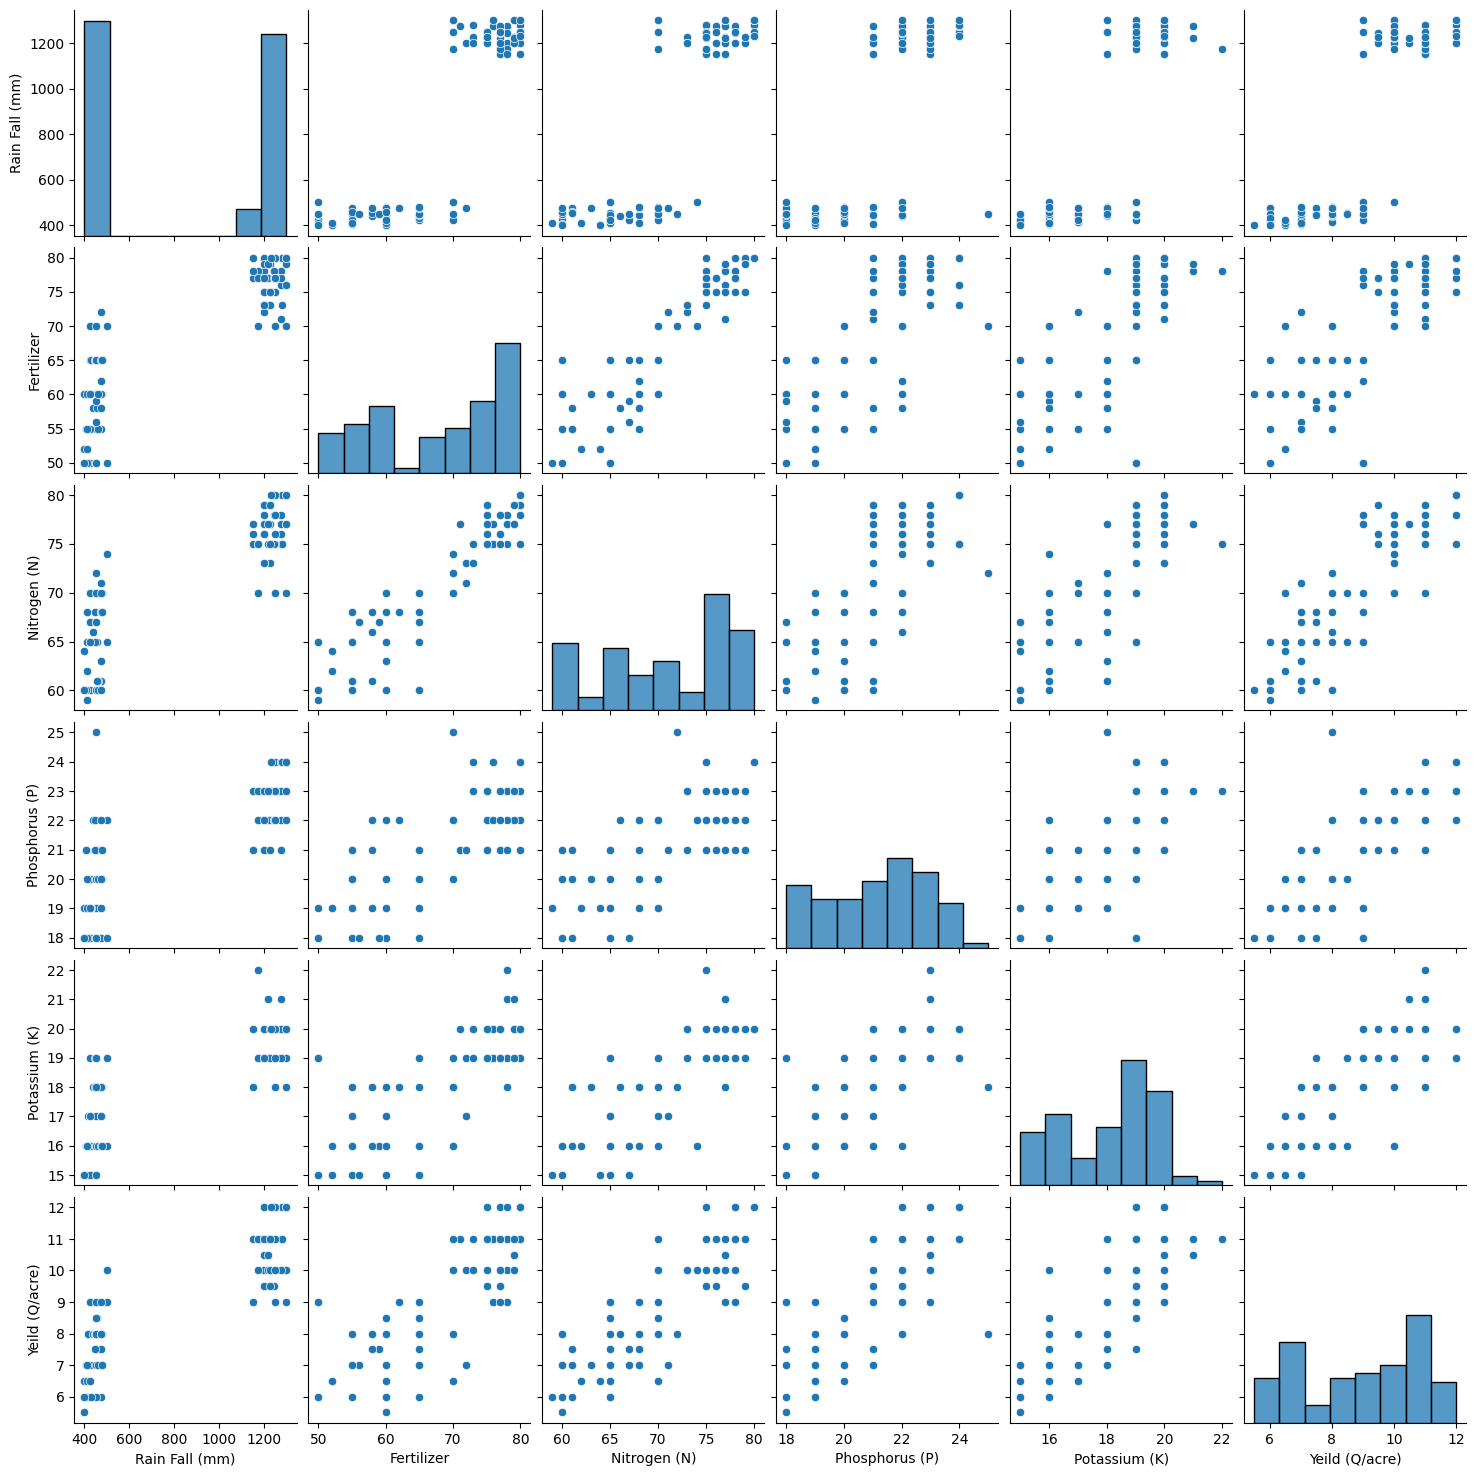

In [51]:
sns.pairplot(db)
plt.show()

# Data Pre-Processing

In [ ]:
db.dropna(inplace=True)
db['Temperatue'] = db['Temperatue'].astype(float)
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     float64
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(7)
memory usage: 6.2 KB


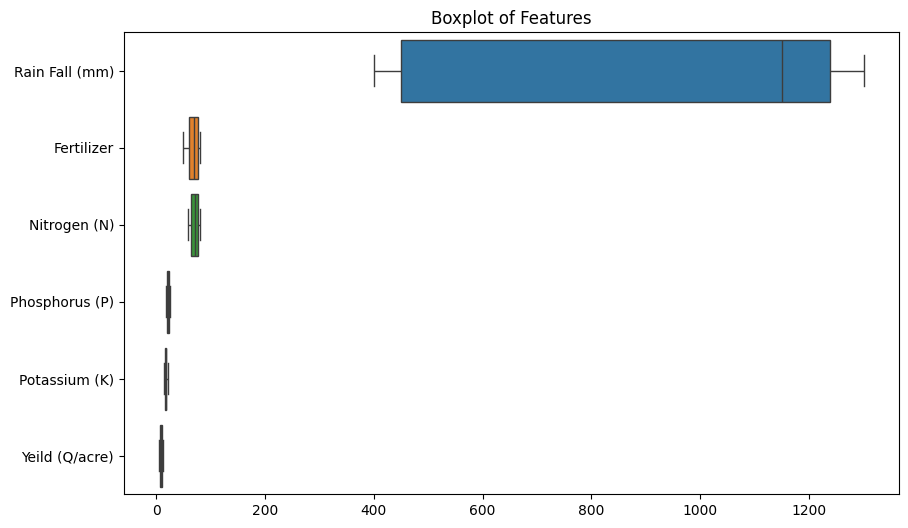

In [49]:
# 4. Outlier Detection
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=db, orient="h")
plt.title('Boxplot of Features')
plt.show()

# Split data

In [ ]:
X = db.iloc[:,:-1]
y = db['Yeild (Q/acre)']
print("size of X: ", X.shape)
print("size of X: ", y.shape)

size of X:  (99, 6)
size of X:  (99,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, shuffle=True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (74, 6)
X_test shape is  (25, 6)
y_train shape is  (74,)
y_test shape is  (25,)


# Model selection

In [ ]:
LinearRegressionModel = LinearRegression()

# Model Training

In [ ]:
LinearRegressionModel.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = LinearRegressionModel.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

Mean Squared Error (MSE):  0.4726664266448377


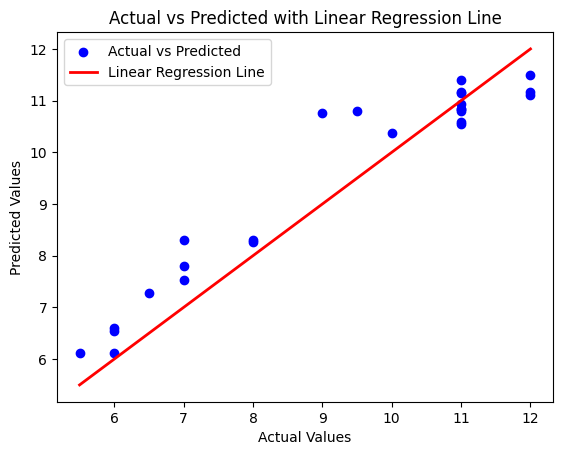

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs predicted values with regression line
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2, label='Linear Regression Line')
plt.title('Actual vs Predicted with Linear Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
